In [1]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd


import matplotlib.pyplot as plt


import plotly.offline as py
py.init_notebook_mode(connected=True)
pio.renderers.default = 'colab'

In [3]:
dataset1 = pd.read_csv("/content/covid.csv")
dataset1.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [4]:
print(dataset1.shape)
print(dataset1.size)

(209, 17)
3553


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [6]:
dataset2 = pd.read_csv("covid_grouped.csv")
dataset2.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [7]:
print(dataset2.shape)

print(dataset2.size)

(35156, 11)
386716


In [8]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


In [9]:
dataset1.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [10]:
dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'],
              axis=1, inplace=True)


dataset1.sample(5)

Country/Region          Continent  Population  TotalCases  TotalDeaths  \
137           Jordan               Asia  10213138.0        1232         11.0   
159  Channel Islands             Europe    174022.0         597         47.0   
196      Saint Lucia      North America    183712.0          25          NaN   
195             Fiji  Australia/Oceania    897095.0          27          1.0   
59           Moldova             Europe   4032983.0       26628        828.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
137          1171.0         50.0               3.0             121.0   
159           533.0         17.0               NaN            3431.0   
196            24.0          1.0               NaN             136.0   
195            18.0          8.0               NaN              30.0   
59          18676.0       7124.0             362.0            6603.0   

     Deaths/1M pop  TotalTests  Tests/1M pop            WHO Region iso_alpha  
137            1.0    628745.0       61562.0  EasternMediterranean       JOR  
159          270.0     30721.0      176535.0                   NaN            
196            NaN      3895.0       21202.0              Americas       LCA  
195            1.0      6693.0        7461.0        WesternPacific       FJI  
59           205.0    128076.0       31757.0                Europe       MDA

In [11]:
from plotly.figure_factory import create_table

colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)

In [12]:
px.bar(dataset1.head(15), x = 'Country/Region',
       y = 'TotalCases',color = 'TotalCases',
       height = 500,hover_data = ['Country/Region','Continent' ])

In [13]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalDeaths', height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [14]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalRecovered', height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [15]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
       color = 'TotalTests', height = 500, hover_data = ['Country/Region', 'Continent'])

In [16]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Country/Region',
       color = 'TotalTests',orientation ='h',  height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [17]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Continent',
       color = 'TotalTests',orientation ='h',  height = 500,
       hover_data = ['Country/Region', 'Continent'])

In [18]:
px.scatter(dataset1, x='Continent',y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases', size='TotalCases', size_max=80)

In [19]:
px.scatter(dataset1.head(57), x='Continent',y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases', size='TotalCases', size_max=80, log_y=True)

In [20]:
px.scatter(dataset1.head(54), x='Continent',y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests', size='TotalTests', size_max=80)

In [21]:
px.scatter(dataset1.head(50), x='Continent',y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests', size='TotalTests', size_max=80, log_y=True)

In [22]:
px.scatter(dataset1.head(100), x='Country/Region', y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases', size='TotalCases', size_max=80)

In [23]:
px.scatter(dataset1.head(30), x='Country/Region', y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size='TotalCases', size_max=80, log_y=True)

In [24]:
px.scatter(dataset1.head(10), x='Country/Region', y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size= 'TotalDeaths', size_max=80)

In [25]:
px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size= 'Tests/1M pop', size_max=80)

In [26]:
px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop',
           hover_data=['Country/Region', 'Continent'],
           color='Tests/1M pop', size= 'Tests/1M pop', size_max=80)

In [27]:
px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths', size= 'TotalDeaths', size_max=80)

In [28]:
px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           color='TotalDeaths', size= 'TotalDeaths', size_max=80,
           log_x=True, log_y=True)

In [29]:
px.scatter(dataset1.head(30), x='TotalTests', y= 'TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests', size= 'TotalTests', size_max=80,
           log_x=True, log_y=True)

In [30]:
px.bar(dataset2, x="Date", y="Confirmed", color="Confirmed",
       hover_data=["Confirmed", "Date", "Country/Region"], height=400)

In [31]:
px.bar(dataset2, x="Date", y="Confirmed", color="Confirmed",
       hover_data=["Confirmed", "Date", "Country/Region"],log_y=True, height=400)

In [32]:
px.bar(dataset2, x="Date", y="Deaths", color="Deaths",
       hover_data=["Confirmed", "Date", "Country/Region"],
       log_y=False, height=400)

In [33]:
df_ind= dataset2.loc[dataset2["Country/Region"]=="India"]

In [34]:
px.bar(df_ind, x="Date", y="Confirmed", color="Confirmed", height=400)

In [35]:
px.bar(df_ind,x="Date", y="Recovered", color="Recovered", height=400)

In [36]:
px.line(df_ind,x="Date", y="Recovered", height=400)

In [37]:
px.line(df_ind,x="Date", y="Deaths", height=400)

In [38]:
px.line(df_ind,x="Date", y="Confirmed", height=400)

In [39]:
px.line(df_ind,x="Date", y="New cases", height=400)

In [40]:
px.bar(df_ind,x="Date", y="New cases", height=400)

In [41]:
px.scatter(df_ind, x="Confirmed", y="Deaths", height=400)

In [42]:
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]

In [43]:
px.bar(df_US, x="Date", y="Confirmed", color="Confirmed", height=400)

In [44]:
px.bar(df_US,x="Date", y="Recovered", color="Recovered", height=400)

In [45]:
px.line(df_US,x="Date", y="Recovered", height=400)

In [46]:
px.line(df_US,x="Date", y="Deaths", height=400)

In [47]:
px.line(df_US,x="Date", y="Confirmed", height=400)

In [48]:
px.line(df_US,x="Date", y="New cases", height=400)

In [49]:
px.bar(df_US,x="Date", y="New cases", height=400)

In [50]:
px.scatter(df_US, x="Confirmed", y="Deaths", height=400)

In [51]:
px.choropleth(dataset2,
              locations="iso_alpha",
              color="Confirmed",
              hover_name="Country/Region",
              color_continuous_scale="Blues",
              animation_frame="Date")

In [52]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Deaths",
              hover_name="Country/Region",
              color_continuous_scale="Viridis",
              animation_frame="Date" )

In [53]:
px.choropleth(dataset2,
              locations='iso_alpha',
              color="Recovered",
              hover_name="Country/Region",
              color_continuous_scale="RdYlGn",
              projection="natural earth",
              animation_frame="Date" )

In [54]:
px.bar(dataset2, x="WHO Region", y="Confirmed", color="WHO Region",
       animation_frame="Date", hover_name="Country/Region")

In [55]:
dataset3= pd.read_csv("coviddeath.csv")
dataset3.head()

Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [56]:
dataset3.tail()

Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

In [57]:
dataset3.groupby(["Condition"]).count()

Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

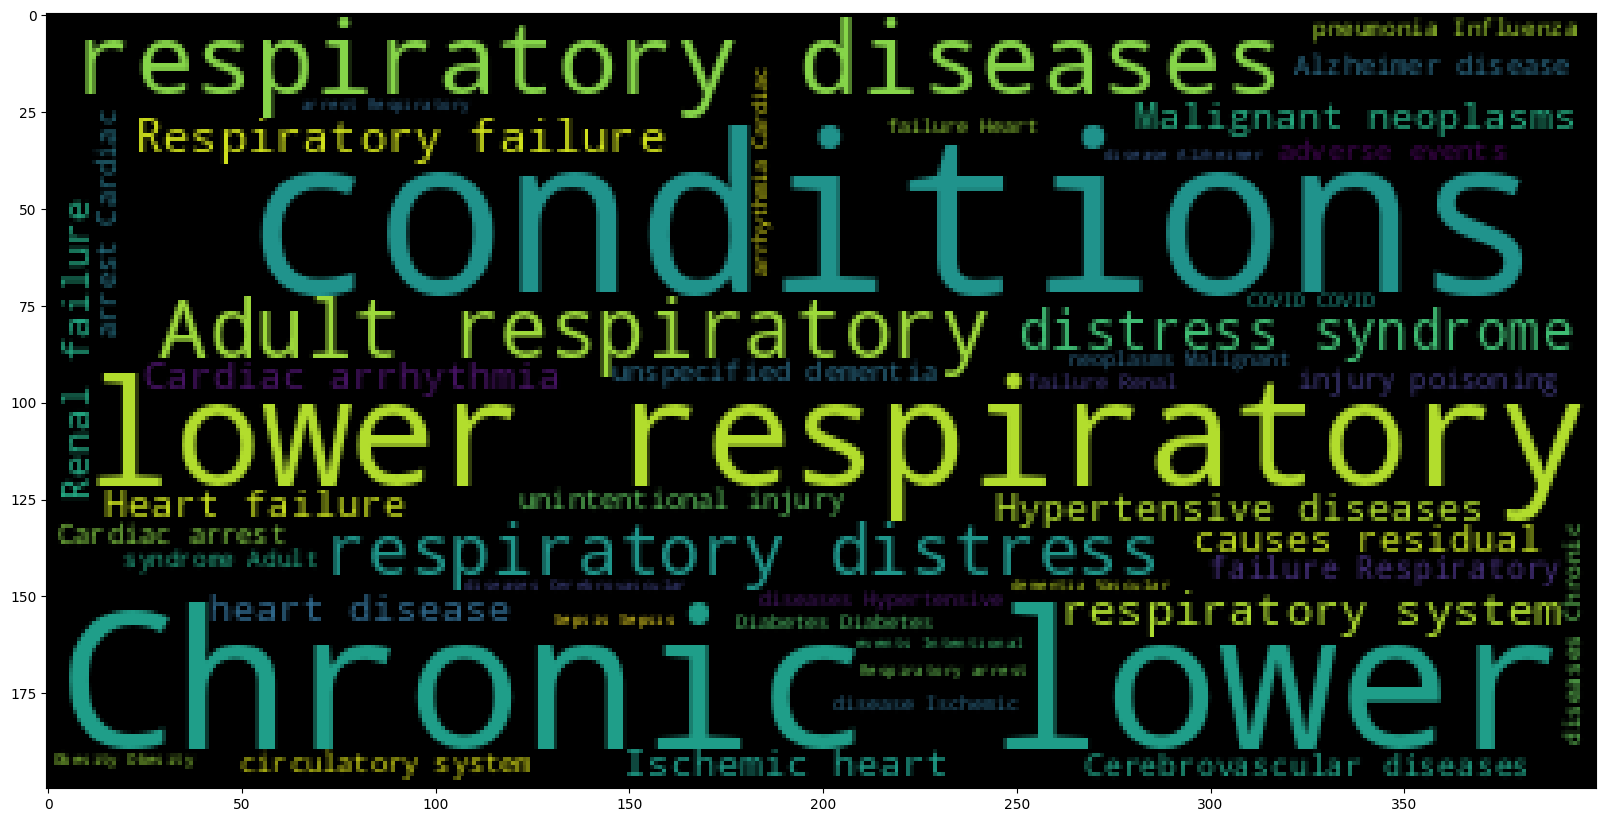

In [58]:
from wordcloud import WordCloud

sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)


plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))

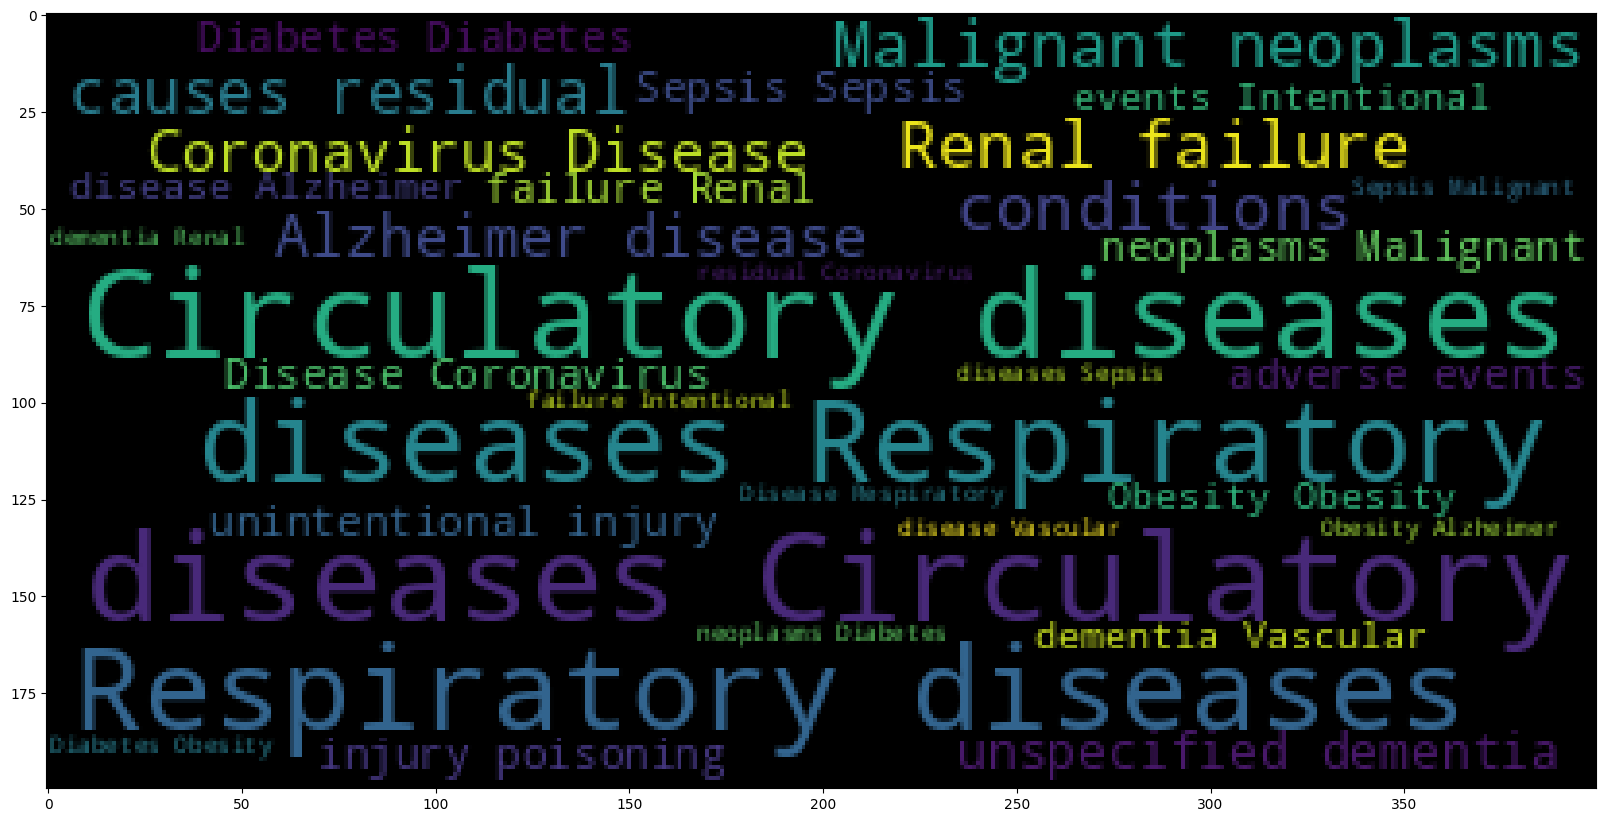

In [59]:
column2_tolist= dataset3["Condition Group"].tolist()

column_to_string= " ".join(column2_tolist)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))